# Week 11 Assignment - Custom Functions and Plotting

Write a function that will read in this week's county-level covid data ("covidData_4.7.20.csv") and create a line plot showing increases in cumulative case counts or deaths through time for  a particular state. The line plot should have labeled axes and a grid.

The function should accept two arguments. The first argument should be the name of the state. The second should indicate whether the user wants to plot case counts or deaths (defaulting to case counts). You will need to write a second function that calculates the case counts per state per day, summing across counties/parishes.

As always, remember to document your code, including docstrings for functions.

NOTE 1: One thing that tripped me up initially - not all counties/parishes have fips codes in this dataset. So that field may be empty for some lines in the file.

NOTE 2: Remember that when you first read from a file, everything is considered a string. To get proper plots, you'll need to convert numbers stored as strings to actual numbers.

In [61]:
# Import needed modules here
import matplotlib.pyplot as plt


In [62]:
def grabStateData(state,counts):
    """This function grabs relevant covid data for the state of choice, requiring the state as the first argument and the counts, either cases or deaths as the second argument, and     calculates the cumulative number of counts."""
    data = open("covidData_4.7.20.csv","r") #opens the relevant file for reading
    xdata=[] #create an empty xdata list
    ydata=[] #create an empty ydata list
    plot1data={} #create an empty dictionary in which to store the data
    for line in data: #iterate through the document line by line 
        if state in line: #if the requested state is found in the line
            date, county, state, fips, cases, deaths=line.split(",") #divide each line into 6 different parts using the comma as a delimitor with line.split
            if counts=="cases": #if you select to look at case counts
                tempdata=int(cases) #convert the cases into integers for plotting into an empty list called tempdata
            elif counts=="deaths": #if you select to look at case counts
                tempdata=int(deaths) #convert the deaths into integers for plotting into an empty list called tempdata
            if date in plot1data: #if the date is found in the dictionary plot1data
                plot1data[date]=plot1data[date]+tempdata #if the date is equal to the date already in the dictionary, then add the tempdata from above to it to account for how many counts
            else:
                plot1data[date]=tempdata #if the date is a new one, then just grab the tempdata
    data.close() #close the data file
    ydata = list(plot1data.values()) #populate the ydata list, convert the dictionary values to a list
    xdata = list(range(0, len(ydata))) #in order to get the days rather than the dates for x-axis, use the length of the ydata list
    return xdata, ydata #store the values of the xdata and ydata lists

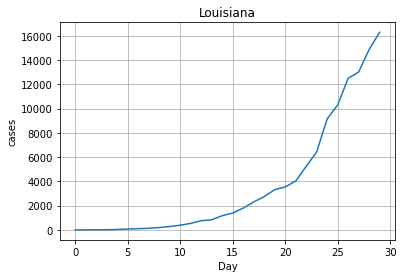

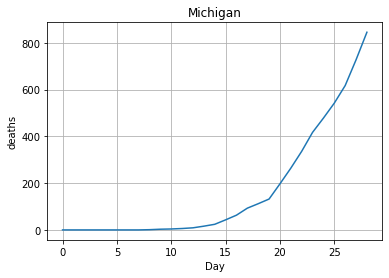

In [66]:
def plotStateGraph(state, counts="cases"):
    """This function plots relevant covid data for the state of choice, calling upon the custom grabStateData function, with the first argument as the desidered state, and the second as either the deaths or cases, with cases as the default.""" 
    xaxis, yaxis = grabStateData(state, counts) #create an xaxis list and yaxis list by grabbing values returned from the first function
    plt.title(state) #use the state of choice as the plot title
    plt.ylabel(counts) #use the count of choice (i.e. deaths or cases) to label the y axis
    plt.xlabel("Day")
    plt.grid(True) #create grid
    plt.plot(xaxis, yaxis)  #line plot using the xaxis and yaxis from above
    plt.show()
plotStateGraph("Louisiana","cases") #test function with Louisiana and number of cases
plotStateGraph ("Michigan","deaths") #test function with Michigan and number of deaths

Write a second function that is similar to the first, but shows increases in cumulative case counts or deaths through time for a particular county/parish in a particular state.

The function should accept three arguments. The first argument should be the name of the county/parish. The second should be the name of the state. The third should indicate whether the user wants to plot case counts or deaths (defaulting to case counts).

As always, remember to document your code, including docstrings for functions.

In [64]:
def grabCountyData(county,state,counts):
    """This function grabs relevant covid data for the county of choice, requiring the county as the first argument, the state as the second argument, and the counts, either               cases or deaths, as the third argument. It calculates the cumulative number of counts."""
    data= open("covidData_4.7.20.csv","r") #opens the file to be read
    xdata=[] #create an empty xdata list
    ydata=[] #create an empty ydata list
    plot1data={} #create an empty dictionary in which to store the data
    for line in data: #iterate through the document line by line 
        if state in line and county in line: #if the requested county and state is found in the line
            date, county, state, fips, cases, deaths=line.split(",") #divide each line into 6 different parts using the comma as a delimitor with line.split
            if counts=="cases": #if you select to look at case counts
                tempdata=int(cases) #convert the cases into integers for plotting into an empty list called tempdata
            elif counts=="deaths":  #if you select to look at case counts
                tempdata=int(deaths) #convert the deaths into integers for plotting into an empty list called tempdata
            year, month, day = date.split("-") #separate out the parts of date into 3 parts
            date=month+"."+day #reformats the date variable so that you remove year
            if date in plot1data: #if the date is found in the dictionary plot1data
                plot1data[date]=plot1data[date]+tempdata #if the date is equal to the date already in the dictionary, then add the tempdata from above to it to account for how many counts
            else:
                plot1data[date]=tempdata #if the date is a new one, then just grab the tempdata
    data.close() #close the data file
    ydata = list(plot1data.values()) #populate the ydata list, convert the dictionary values to a list
    xdata = list(plot1data.keys()) #populate the xdata list, using the dictionary key values to a list
    return xdata, ydata #store the values of the xdata and ydata lists

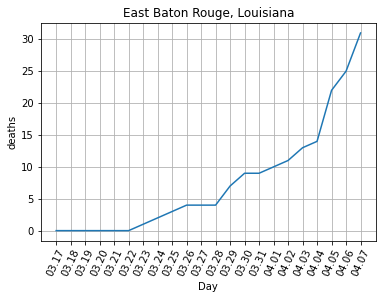

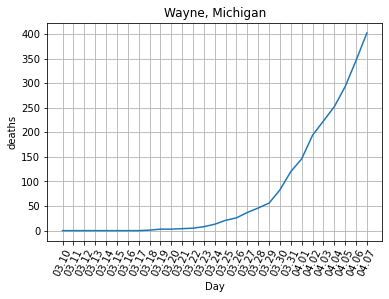

In [65]:
def plotCountyGraph(county,state,counts="cases"):
    """This function plots relevant covid data for the county of choice, state of choice, and the count of choice (either deaths or cases, with cases as the default. The function calls upon the custom grabCountyData function.""" 
    xaxis, yaxis = grabCountyData(county,state,counts)  #create an xaxis list and yaxis list by grabbing values returned from the first function
    plt.title(county+", "+state) #use the county and state of choice as the plot title
    plt.ylabel(counts) #use the count of choice (i.e. deaths or cases) to label the y axis
    plt.xticks(rotation=65) #rotate the x-ticks so that the date can be seen easily
    plt.xlabel("Day") 
    plt.grid(True) #create grid
    plt.plot(xaxis, yaxis)  #line plot using the xaxis and yaxis from above
    plt.show() #show the plot
plotCountyGraph("East Baton Rouge","Louisiana","deaths")  #test function with East Baton Rouge county, Louisiana state, and number of cases
plotCountyGraph ("Wayne", "Michigan","deaths") #test function with Wayne county, Michigan state, and number of cases